<a href="https://colab.research.google.com/github/SamarGuizani/Scarpy/blob/main/Clustering4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLUSTERING SAMAR GUIZANI

In [1]:
!pip install scrapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 4.4 MB/s eta 0:00:00


In [2]:
!scrapy startproject capricieusescraper


New Scrapy project 'capricieusescraper', using template directory '/usr/local/lib/python3.11/dist-packages/scrapy/templates/project', created in:
    /content/capricieusescraper

You can start your first spider with:
    cd capricieusescraper
    scrapy genspider example example.com


In [3]:
!scrapy shell

2025-03-05 22:01:29 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: scrapybot)
2025-03-05 22:01:29 [scrapy.utils.log] INFO: Versions: lxml 5.3.1.0, libxml2 2.12.9, cssselect 1.2.0, parsel 1.10.0, w3lib 2.3.1, Twisted 24.11.0, Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0], pyOpenSSL 24.2.1 (OpenSSL 3.3.2 3 Sep 2024), cryptography 43.0.3, Platform Linux-6.1.85+-x86_64-with-glibc2.35
2025-03-05 22:01:29 [scrapy.addons] INFO: Enabled addons:
[]
2025-03-05 22:01:29 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2025-03-05 22:01:29 [scrapy.extensions.telnet] INFO: Telnet Password: 0c7de238dab05486
2025-03-05 22:01:29 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage']
2025-03-05 22:01:29 [scrapy.crawler] INFO: Overridden settings:
{'DUPEFILTER_CLASS': 'scrapy.dupefilters.BaseDupeFilter',
 'LOGSTATS_INTERVAL': 0}
2025-0

In [4]:
%cd /content/capricieusescraper/capricieusescraper/spiders

/content/capricieusescraper/capricieusescraper/spiders


In [5]:
%%writefile capricieusespider.py

import scrapy

class capricieusespider(scrapy.Spider):
    name = 'capricieusescraper'
    start_urls = ['http://www.capricieuse.tn/product-categories/Robes']

    def parse(self, response):
        # Extract product information
        titles = response.css('a.product__title::text').getall()
        prices = response.css('p.product__price span::text').getall()

        # Combine the extracted data into a dictionary
        for title, price in zip(titles, prices):
            yield {
                'title': title.strip(),
                'price': price.strip(),
            }

        # Handle pagination
        next_page = response.css('a[rel="next"]::attr(href)').get()
        if next_page:
            yield response.follow(next_page, self.parse)

Writing capricieusespider.py


In [6]:
%cd /content/capricieusescraper/capricieusescraper/spiders

/content/capricieusescraper/capricieusescraper/spiders


In [7]:
!scrapy crawl capricieusescraper -o capricieuse.json

2025-03-05 22:04:31 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: capricieusescraper)
2025-03-05 22:04:31 [scrapy.utils.log] INFO: Versions: lxml 5.3.1.0, libxml2 2.12.9, cssselect 1.2.0, parsel 1.10.0, w3lib 2.3.1, Twisted 24.11.0, Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0], pyOpenSSL 24.2.1 (OpenSSL 3.3.2 3 Sep 2024), cryptography 43.0.3, Platform Linux-6.1.85+-x86_64-with-glibc2.35
2025-03-05 22:04:31 [scrapy.addons] INFO: Enabled addons:
[]
2025-03-05 22:04:31 [asyncio] DEBUG: Using selector: EpollSelector
2025-03-05 22:04:31 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-03-05 22:04:31 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
2025-03-05 22:04:31 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-03-05 22:04:31 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop


In [8]:
!scrapy list


capricieusescraper


Clustering


In [9]:
!pip install pandas

In [10]:
import pandas as pd

df = pd.read_json('capricieuse.json')
print(df.head())

                   title      price
0        Abaya Chem Rose  140.000Dt
1          Abaya ASAYEL.  150.000Dt
2    Abaya RATEEL Beige.  120.000Dt
3  Abaya RATEEL Caramel.  120.000Dt
4     Abaya RATEEL Noir.  120.000Dt


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
df=pd.read_json('capricieuse.json')
df['content']=df['title']+df['price']
vector = TfidfVectorizer(max_df=0.5,min_df=5)
tf_idf_matrix=vector.fit_transform(df['content'])
terms=vector.get_feature_names_out()
print(f"{terms}")
print(f"\n TF-IDF matrix shape :{tf_idf_matrix.shape}")

['abaya' 'deux' 'jebbah' 'pièces']

 TF-IDF matrix shape :(39, 4)


Loaded data:
                   title      price
0        Abaya Chem Rose  140.000Dt
1          Abaya ASAYEL.  150.000Dt
2    Abaya RATEEL Beige.  120.000Dt
3  Abaya RATEEL Caramel.  120.000Dt
4     Abaya RATEEL Noir.  120.000Dt
Title features shape: (39, 39)
Combined features shape: (39, 40)


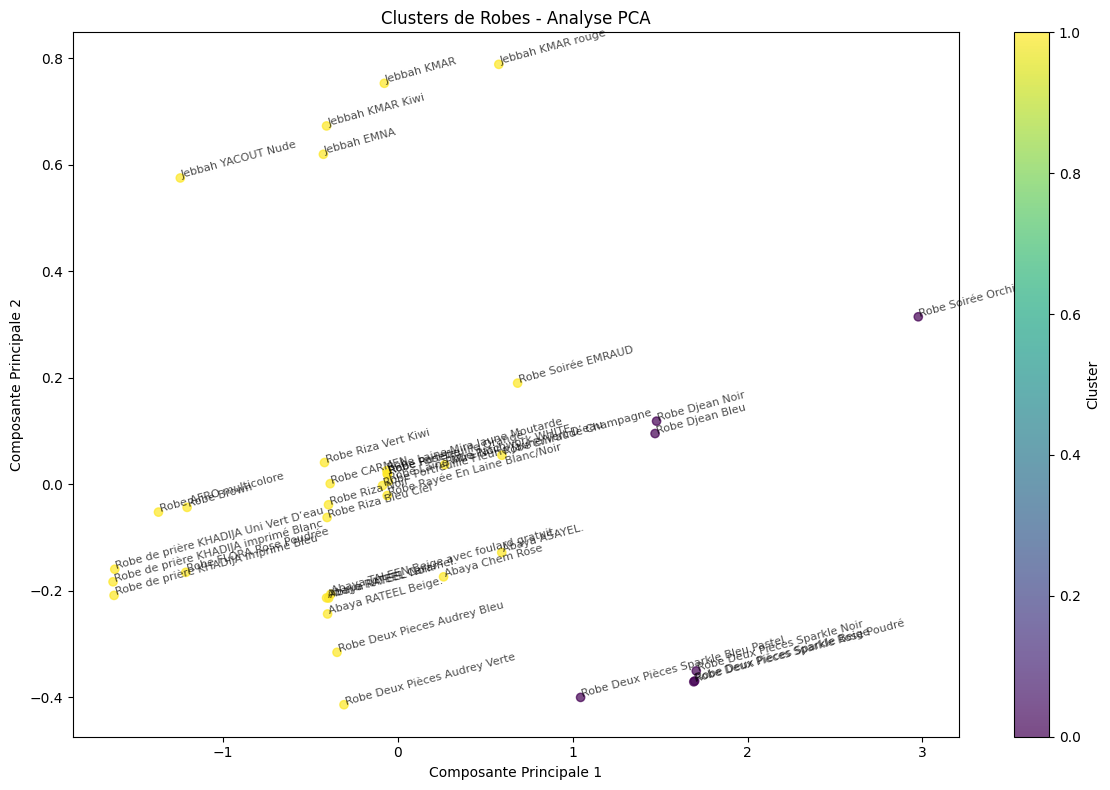

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# Load your dress data
df = pd.read_json('capricieuse.json')
print("Loaded data:")
print(df.head())

# Preprocess price data
# Convert "175.000Dt" to numeric value
df['price_numeric'] = df['price'].str.replace('Dt', '').str.strip().astype(float)

# Define French stopwords
french_stopwords = [
    "au", "aux", "avec", "ce", "ces", "dans", "de", "des", "du", "elle", "en", "et",
    "eux", "il", "je", "la", "le", "les", "leur", "lui", "ma", "mais", "me", "même",
    "mes", "moi", "mon", "ne", "nos", "notre", "nous", "on", "ou", "par", "pas",
    "pour", "qu", "que", "qui", "sa", "se", "ses", "son", "sur", "ta", "te", "tes",
    "toi", "ton", "tu", "un", "une", "vos", "votre", "vous", "c", "d", "j", "l",
    "à", "m", "n", "s", "t", "y", "été", "étée", "étées", "étés", "étant", "étante",
    "étants", "étantes", "suis", "es", "est", "sommes", "êtes", "sont", "serai",
    "seras", "sera", "serons", "serez", "seront", "serais", "serait", "serions",
    "seriez", "seraient", "étais", "était", "étions", "étiez", "étaient", "fus",
    "fut", "fûmes", "fûtes", "furent", "sois", "soit", "soyons", "soyez", "soient",
    "fusse", "fusses", "fût", "fussions", "fussiez", "fussent", "ayant", "ayante",
    "ayantes", "ayants", "eu", "eue", "eues", "eus", "ai", "as", "avons", "avez",
    "ont", "aurai", "auras", "aura", "aurons", "aurez", "auront", "aurais", "aurait",
    "aurions", "auriez", "auraient", "avais", "avait", "avions", "aviez", "avaient",
    "eut", "eûmes", "eûtes", "eurent", "aie", "aies", "ait", "ayons", "ayez",
    "aient", "eusse", "eusses", "eût", "eussions", "eussiez", "eussent"
]

# Use title text for TF-IDF with French stopwords
vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=2,
    stop_words=french_stopwords,  # Use the list of French stopwords
    analyzer='word',
    ngram_range=(1, 2)  # Consider word combinations
)
title_features = vectorizer.fit_transform(df['title'])
print("Title features shape:", title_features.shape)

# Scale numeric prices separately
scaler = StandardScaler()
price_features = scaler.fit_transform(df[['price_numeric']])

# Combine features horizontally
combined_features = hstack([title_features, price_features])
print("Combined features shape:", combined_features.shape)

# Use 2 clusters based on your previous work
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(combined_features)

# Visualization with French labels
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(combined_features.toarray())

plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_features[:, 0],
                     reduced_features[:, 1],
                     c=df['cluster'],
                     cmap='viridis',
                     alpha=0.7)

# Add annotations with dress names
for i, txt in enumerate(df['title']):
    plt.annotate(txt,
                (reduced_features[i, 0], reduced_features[i, 1]),
                fontsize=8,
                alpha=0.7,
                rotation=15)

plt.title("Clusters de Robes - Analyse PCA")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()